In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pickle

In [2]:
# The path of the datasets, use dict format
dataset_path = {"base": "../dataset/ccpd/splitted_plates_base", 
                "challenge":"../dataset/ccpd/splitted_plates_challenge",
               "db":"../dataset/ccpd/splitted_plates_db",
               "fn":"../dataset/ccpd/splitted_plates_fn",
               "weather":"../dataset/ccpd/splitted_plates_weather"}
# Resize the images to the same image size
img_h, img_w = 32,16

In [3]:
datasets = {}
for each_key in dataset_path:
    cur_dataset = dataset_path[each_key]
    dirs = os.listdir(cur_dataset)
    Y2X = {} # from the image name to all images (np array)
    for each in dirs:
        if '.' in each:
            continue
        files = os.listdir(cur_dataset + "/" + each)
        X = []
        for file in files:
            img = Image.open(cur_dataset + "/" + each + '/' + file)
            img = img.convert('L') # conver to grayscale images
            img = img.resize([img_w, img_h])
            img_np = np.asarray(img)
            X.append(img_np.reshape([-1]))
        Y2X[each] = np.asarray(X)
    datasets[each_key] = Y2X

In [4]:
datasets.keys()

dict_keys(['base', 'challenge', 'db', 'fn', 'weather'])

In [5]:
datasets["base"].keys()

dict_keys(['R', 'U', '9', '0', '7', 'I', 'N', 'G', '6', 'Z', '1', '8', 'T', 'S', 'A', 'F', 'H', 'M', 'J', 'C', 'D', 'V', 'Q', '4', 'X', '3', 'E', 'B', 'K', 'L', '2', 'Y', '5', 'P', 'W'])

In [6]:
datasets["base"]['X'].shape

(90, 512)

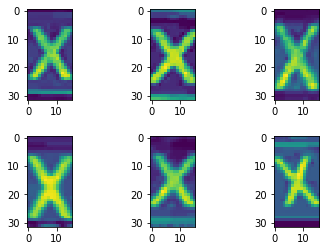

In [7]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(6):
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(Y2X['X'][i].reshape([img_h, img_w]))

In [8]:
# save the datasets
with open('datasets/datasets.pkl', 'wb') as f:
    pickle.dump(datasets, f)